<a href="https://colab.research.google.com/github/YumYumKarma/MachineLearning-Tensorflow-/blob/main/BasicImageClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Importing fashion MNIST dataset

In [36]:
fashion_MNIST=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_MNIST.load_data()

class names

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
train_images.shape

(60000, 28, 28)

In [39]:
len(train_images)

60000

In [40]:
len(train_labels)

60000

In [41]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
len(test_labels)

10000

Preprocessing the data

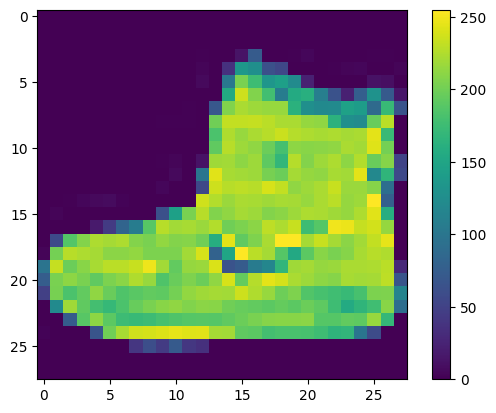

In [44]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

scaling them in range [0 - 1]

In [45]:
train_images = train_images / 255.0
train_images = train_images / 255.0

Looking into dataset

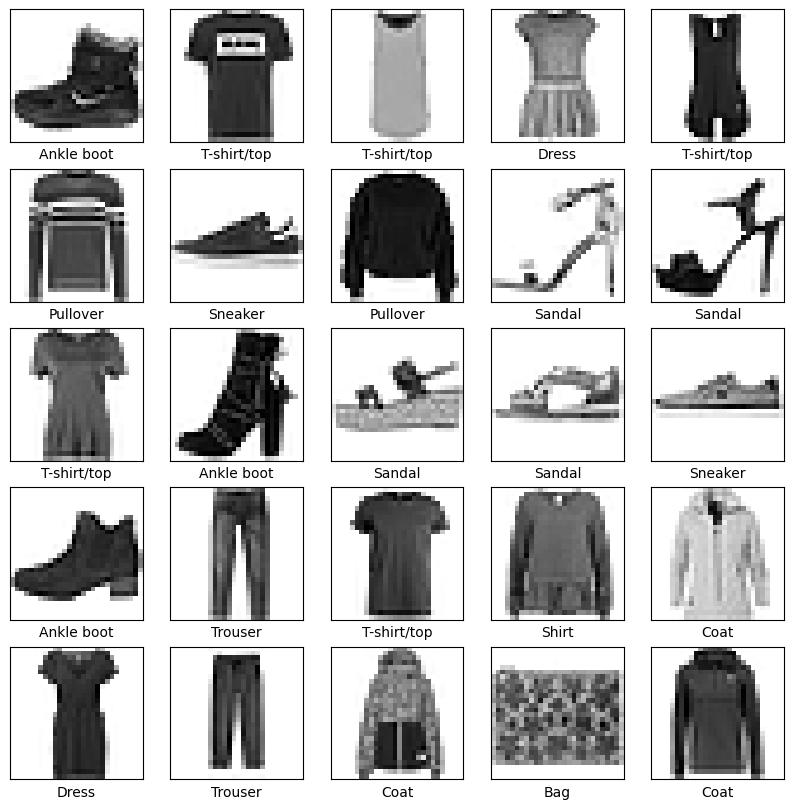

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Building the Model

building a 3 layered sequential Model(input-Hidden layer-output)

In [47]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

Compiling the model

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [49]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0917 - accuracy: 0.6669
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6426 - accuracy: 0.7686
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5651 - accuracy: 0.7982
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5214 - accuracy: 0.8151
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4933 - accuracy: 0.8266
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4738 - accuracy: 0.8331
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4587 - accuracy: 0.8397
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4463 - accuracy: 0.8430
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4363 - accuracy: 0.8472
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.42

Evaluating Accuracy

In [50]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - loss: 21835.6699 - accuracy: 0.6947 - 544ms/epoch - 2ms/step

Test accuracy: 0.6947000026702881


Accuracy on the test dataset is less then that of the training dataset that means there is overfitting

Making predictions :

creating probability model using softmax layer which converts linear outpput of models into probabilities(logits-probabilities).

In [51]:
probability_model=tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [52]:
predictions=probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [53]:
predictions[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [54]:
np.argmax(predictions[0])

9

In [55]:
test_labels[0]

9

Defining a function to graph the full set of 10 class predictions

In [56]:
def plot_image(i, predictions_array, true_label, img):
  true_label,img=true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel("{} {:2.0f}% ({})".format(
      class_names[predicted_label],
      100*np.max(predictions_array),
      class_names[true_label]),
      color=color)

def plot_value_array(i,predictions_array,true_label):
  true_label=true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verifying the predictions

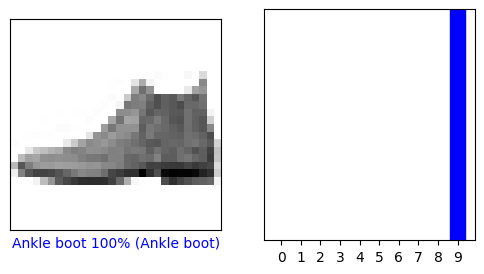

In [57]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

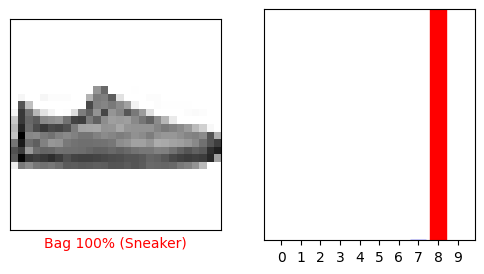

In [58]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

Plotting several image predictions

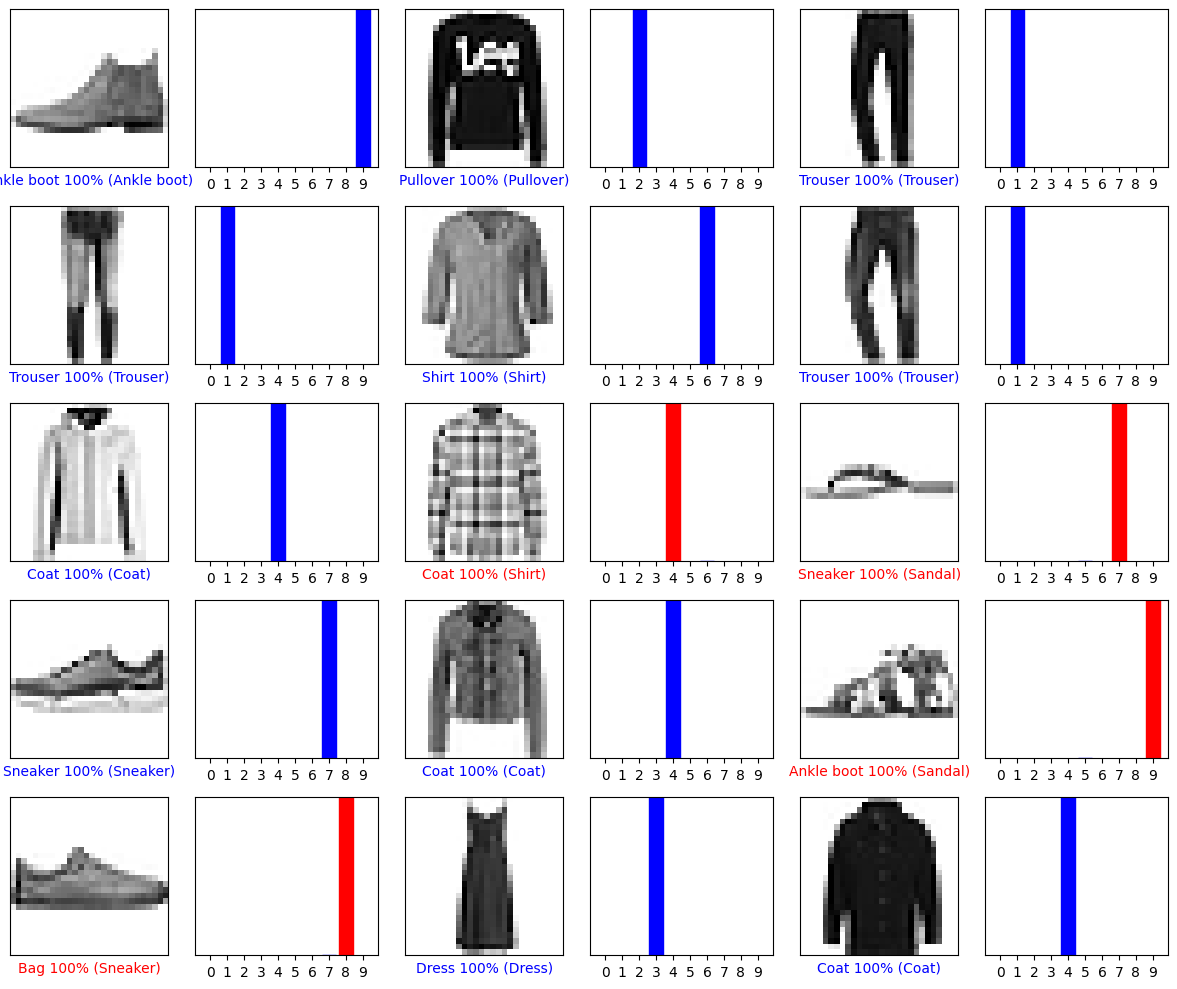

In [59]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i], test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

using the trained model

In [60]:
img=test_images[1]

In [61]:
print(img.shape)

(28, 28)


In [64]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [65]:
predictions_single=probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


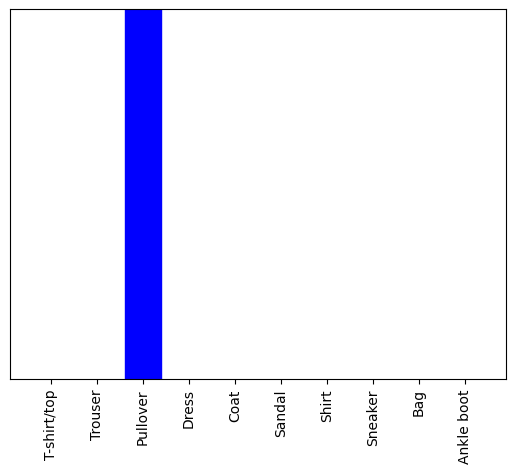

In [72]:
plot_value_array(1,predictions_single[0],test_labels)
plt.xticks(range(10),class_names,rotation=90)
plt.show()

In [73]:
np.argmax(predictions_single[0])

2